In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [93]:
df = pd.read_csv('MES_DEFINITIVO.csv', low_memory=False)
df

,author,aut_scrname,tweet_id,retweeted_status,full_text,reply,created_at,retweet_count,favorite_count,hashtags,...,complete_text,prev,p,0,cap,universal,friend,temporal,user,network
0,ROBYUS,78_robyus,1198961837112475653,La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,RT @Rinaldi_euro: La riforma del #Mes e una cagata pazzesca! \nhttps://t.co/Z9w4KlUVcb https://t.co/ddSx5mx4Ou,NaN,2019-11-25 13:49:12,612,0,None,...,La riforma del Mes e una cagata pazzesca,1,1.000000,78_robyus,0.010165,0.170132,0.311763,0.460315,0.067460,0.129106
1,ROBYUS,78_robyus,1200291943944740866,A prescindere dal Vostro orientamento politico @GiorgiaMeloni ha dato voce a TUTTI\n\n#Meloni \n#StopMes\n#MES\n#Conte https://t.co/6Dmvg4C4IN,RT @flayawa: A prescindere dal Vostro orientamento politico @GiorgiaMeloni ha dato voce a TUTTI\n\n#Meloni \n#StopMes\n#MES\n#Conte https://t.co,NaN,2019-11-29 05:54:34,151,0,None,...,A prescindere dal Vostro orientamento politico GiorgiaMeloni ha dato voce a TUTTI Meloni StopMes MES Conte,1,0.971212,78_robyus,0.010165,0.170132,0.311763,0.460315,0.067460,0.129106
2,Antonia Agostini,antoniacri,1198962278047068162,Giorno 9\n#StopMes NO al #MES\n#StopMes No al #MES \n#StopMes NO al #MES \n#StopMes NO al #MES\n#StopMes NO al #MES \n#StopMes NO al #MES,RT @Nadezhda24Kr: Giorno 9\n#StopMes NO al #MES\n#StopMes No al #MES \n#StopMes NO al #MES \n#StopMes NO al #MES\n#StopMes NO al #MES \n#Stop,NaN,2019-11-25 13:50:57,1,0,None,...,Giorno 9 StopMes NO al MES StopMes No al MES StopMes NO al MES StopMes NO al MES StopMes NO al MES StopMes NO al MES,1,0.976877,antoniacri,0.005213,0.111167,0.178233,0.301336,0.212079,0.568829
3,Antonia Agostini,antoniacri,1199406183779618816,Bisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES,RT @Nadezhda24Kr: Bisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #MES\nBisogna bloccare il #,NaN,2019-11-26 19:14:52,2,0,None,...,Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES Bisogna bloccare il MES,1,0.993002,antoniacri,0.005213,0.111167,0.178233,0.301336,0.212079,0.568829
4,Antonia Agostini,antoniacri,1199487003877924865,giorno 10\nAnche oggi\n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes,RT @VedeleAngela: giorno 10\nAnche oggi\n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #MES \n#StopMes No al #,NaN,2019-11-27 00:36:01,18,0,None,...,giorno 10 Anche oggi StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes No al MES StopMes,1,0.976976,antoniacri,0.005213,0.111167,0.178233,0.301336,0.212079,0.568829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241495,Matteo Corrocher,CorrocherMatteo,1206344347345702917,"Quando un cialtrone sovranista dice che il #MES serve per salvare Deutsche Bank con i soldi italiani, ricordagli questa lista di banche nostrane e chiedigli quanto quota il CDS di DB rispetto alla piu grande banca italiana. Se ti risponde Bacioni, hai trovato il Capitano. https://t.co/zGoQRr4s6w","RT @carloalberto: Quando un cialtrone sovranista dice che il #MES serve per salvare Deutsche Bank con i soldi italiani, ricordagli questa",NaN,2019-12-15 22:44:39,172,0,None,...,Quando un cialtrone sovranista dice che il MES serve per salvare Deutsche Bank con i soldi italiani ricordagli questa lista di banche nostrane e chiedigli quanto quota il CDS di DB rispetto alla piu g

In [14]:
df1 = df[['aut_scrname', 'prev', 'cap']]
df1

,aut_scrname,prev,cap
0,78_robyus,1,0.010165
1,78_robyus,1,0.010165
2,antoniacri,1,0.005213
3,antoniacri,1,0.005213
4,antoniacri,1,0.005213
...,...,...,...
241495,CorrocherMatteo,3,-1.000000
241496,GiancarloPoli7,1,0.002198
241497,dnl_brg,1,-1.000000
241498,s_capaccioli,3,0.002910


In [21]:
df_new = df1.groupby(['aut_scrname']).apply(pd.DataFrame.mode).reset_index(drop=True)

In [22]:
df_new

,aut_scrname,prev,cap
0,000Rizzo,1,0.005213
1,000Salvatore,1,0.004304
2,000_o00000,2,-1.000000
3,00650301,1,0.385459
4,007Vincentxxx,2,0.005778
...,...,...,...
32719,zulian_sonia,1,0.003626
32720,zuma2007,1,0.001866
32721,NaN,3,NaN
32722,zxuz53,1,0.002910


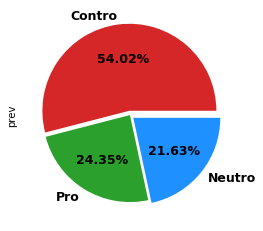

In [24]:
explode2 = (0.05, 0.0, 0.05)
labels = ('Contro', 'Pro','Neutro')
ax = df_new['prev'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=('tab:red', 'tab:green', 'dodgerblue'), labels=labels, textprops={'color':'black', 'weight':'bold', 'fontsize':12.5}, explode = explode2)

In [96]:
intervals = [0,0.2,0.4,0.6,0.8,1]
df1["interval"] = pd.cut(df1["cap"],bins=intervals)

In [97]:
df1

,aut_scrname,prev,cap,interval
0,78_robyus,1,0.010165,"(0.0, 0.2]"
1,78_robyus,1,0.010165,"(0.0, 0.2]"
2,antoniacri,1,0.005213,"(0.0, 0.2]"
3,antoniacri,1,0.005213,"(0.0, 0.2]"
4,antoniacri,1,0.005213,"(0.0, 0.2]"
...,...,...,...,...
241495,CorrocherMatteo,3,-1.000000,NaN
241496,GiancarloPoli7,1,0.002198,"(0.0, 0.2]"
241497,dnl_brg,1,-1.000000,NaN
241498,s_capaccioli,3,0.002910,"(0.0, 0.2]"


In [98]:
result = (df1.groupby([pd.Grouper(key="prev"),"interval"])["interval"].count()
          .unstack(0).T.fillna(0))

In [99]:
result

interval,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
prev,,,,,
1,154750,1245,385,168,805
2,38301,425,155,94,116
3,20494,225,79,43,15


In [100]:
div = result.sum(axis=1)
div

prev
1    157353
2    39091 
3    20856 
dtype: int64

In [101]:
result.div([157353,39091,20856], axis='rows')

interval,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
prev,,,,,
1,0.983458,0.007912,0.002447,0.001068,0.005116
2,0.979791,0.010872,0.003965,0.002405,0.002967
3,0.982643,0.010788,0.003788,0.002062,0.000719
